In [6]:
import pandas as pd
import seaborn as sns
from joblib import load
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from termcolor import colored

In [7]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')
X_train.head()

,Belts,PersonalInjury,PropertyDamage,CommercialLicense,CommercialVehicle,ContributedToAccident,Gender,VehicleType_'02 - Automobile',VehicleType_'03 - Station Wagon',VehicleType_'04 - Limousine',...,Model_VAN,Model_VERSA,Model_VN,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_OTHER,Race_WHITE,ArrestType_Marked Patrol,ArrestType_Unmarked Patrol
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [8]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['Kazna', 'Oprema', 'Upozorenje'], index=['0', '1', '2']))
    print("---------------------------------------------------------------------------------")

In [9]:
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['Kazna', 'Oprema', 'Upozorenje'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")

## Stablo odlučivanja

Napravimo prvo stablo odlučivanja bez ikakvih parametara.

In [10]:
dtc_noParams = DecisionTreeClassifier()

In [11]:
dtc_noParams.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
report(dtc_noParams, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     23810
           1       0.95      0.96      0.95     23810
           2       0.91      0.83      0.87     23810

    accuracy                           0.90     71430
   macro avg       0.90      0.90      0.90     71430
weighted avg       0.90      0.90      0.90     71430

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  21477     632        1701
1    608   22849         353
2   3380     561       19869
---------------------------------------------------------------------------------


In [20]:
report(dtc_noParams, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      9637
           1       0.07      0.19      0.10      1049
           2       0.54      0.44      0.48     10205

    accuracy                           0.46     20891
   macro avg       0.37      0.38      0.37     20891
weighted avg       0.50      0.46      0.48     20891

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0   4965    1181        3491
1    435     195         419
2   4307    1395        4503
---------------------------------------------------------------------------------


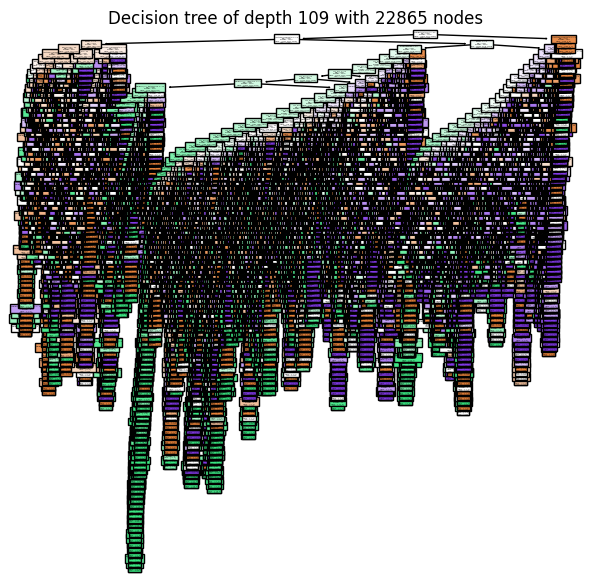

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [13]:
feature_names = X_train.columns
plot_decision_tree(dtc_noParams, feature_names)

Vidimo da je model pretreniran. 

Napravićemo novi model sa ograničenom dubinom i zadatim kriterijumom podele.

In [14]:
dtc = DecisionTreeClassifier(max_depth=30, criterion='entropy')

In [15]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [16]:
report(dtc, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.64      0.67     23810
           1       0.69      0.86      0.77     23810
           2       0.73      0.62      0.67     23810

    accuracy                           0.71     71430
   macro avg       0.71      0.71      0.70     71430
weighted avg       0.71      0.71      0.70     71430

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  15278    4776        3756
1   1683   20578        1549
2   4590    4553       14667
---------------------------------------------------------------------------------


In [17]:
report(dtc, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.45      0.48      9637
           1       0.07      0.32      0.12      1049
           2       0.55      0.42      0.47     10205

    accuracy                           0.43     20891
   macro avg       0.38      0.40      0.36     20891
weighted avg       0.51      0.43      0.46     20891

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0   4310    2148        3179
1    350     337         362
2   3616    2310        4279
---------------------------------------------------------------------------------


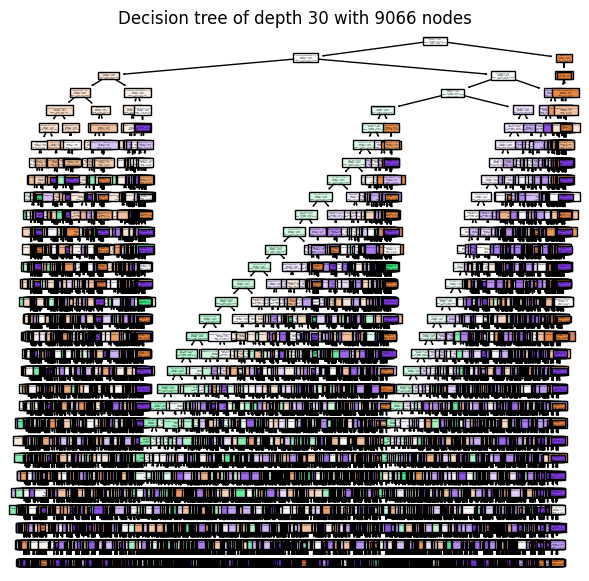

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion entropy
max_depth 30
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [18]:
feature_names = X_train.columns
plot_decision_tree(dtc, feature_names)

Takođe, možemo prikazati i koji atributi su bili od najvećeg značaja prilikom formiranja stabla odlučivanja.

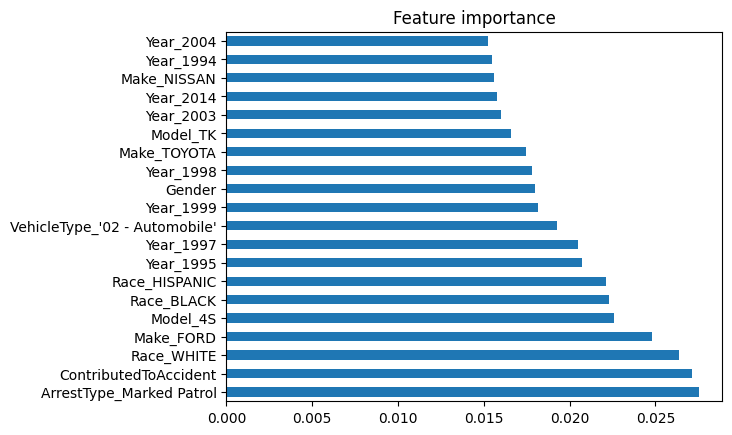

In [23]:
feat_importances = pd.Series(dtc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.title("Feature importance")
plt.show()

Na osnovu grafika možemo videti da je atribut sa najvećim značajem hapšenje sa vozilom na dužnosti.

Pokušaćemo da unapredimo model promenom hiper-parametara.

# Podešavanje hiper-parametara

## GridSearchCV

U mapi čuvamo informaciju o imenima i vrednostima parametara koje želimo da ispitamo.

In [24]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
         }

In [25]:
estimator_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3)

In [26]:
estimator_dtc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                       60, 65, 70]})

Možemo pogledati koja je najbolja kombinacija parametara.

In [27]:
estimator_dtc.best_params_

{'criterion': 'gini', 'max_depth': 70}

Kao i najbolji score.

In [28]:
estimator_dtc.best_score_

0.6080638387232256

In [29]:
report(estimator_dtc.best_estimator_, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     23810
           1       0.94      0.96      0.95     23810
           2       0.91      0.83      0.87     23810

    accuracy                           0.90     71430
   macro avg       0.90      0.90      0.89     71430
weighted avg       0.90      0.90      0.89     71430

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  21350     760        1700
1    618   22837         355
2   3377     676       19757
---------------------------------------------------------------------------------


In [30]:
report(estimator_dtc.best_estimator_, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      9637
           1       0.07      0.19      0.10      1049
           2       0.54      0.44      0.48     10205

    accuracy                           0.46     20891
   macro avg       0.37      0.38      0.37     20891
weighted avg       0.50      0.46      0.48     20891

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0   4921    1248        3468
1    429     197         423
2   4231    1466        4508
---------------------------------------------------------------------------------


Takođe, možemo detaljnije pogledati i rezultate cross validacije.

In [31]:
estimator_dtc.cv_results_

{'mean_fit_time': array([0.45157067, 0.65815965, 0.7489868 , 0.83780917, 0.89608399,
        1.01996938, 1.09769781, 1.04757563, 1.10116386, 1.16396443,
        1.1831255 , 1.21337191, 1.1735514 , 0.41442355, 0.61330859,
        0.74930024, 0.84225027, 0.97619979, 0.98568408, 1.0211846 ,
        1.04469275, 1.09785652, 1.1225005 , 1.17137774, 1.39010008,
        1.28720458]),
 'std_fit_time': array([0.0167115 , 0.01751736, 0.0272304 , 0.02644622, 0.03187964,
        0.09255565, 0.05827519, 0.05487547, 0.04097618, 0.05248681,
        0.07056423, 0.04198427, 0.0492305 , 0.00742039, 0.01520542,
        0.00204705, 0.00195729, 0.02108318, 0.05079499, 0.02669113,
        0.04925744, 0.01977035, 0.06001103, 0.01799848, 0.05365655,
        0.03711595]),
 'mean_score_time': array([0.02528699, 0.02658423, 0.02261186, 0.02226178, 0.02443194,
        0.02689703, 0.02891946, 0.02889649, 0.02914302, 0.0272553 ,
        0.03058394, 0.03157957, 0.02728009, 0.02529319, 0.02527078,
        0.02227545, 

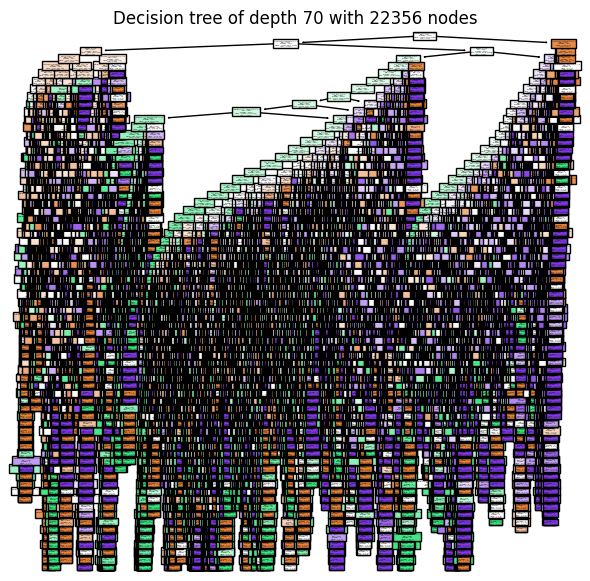

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth 70
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [32]:
plot_decision_tree(estimator_dtc.best_estimator_, feature_names)

## Slučajne šume

In [33]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=23)
random_forest.fit(X_train, y_train)

report(random_forest, X_train, y_train)

report(random_forest, X_test, y_test, "test")

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     23810
           1       0.95      0.96      0.95     23810
           2       0.87      0.88      0.87     23810

    accuracy                           0.90     71430
   macro avg       0.90      0.90      0.90     71430
weighted avg       0.90      0.90      0.90     71430

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  20398     777        2635
1    413   22902         495
2   2406     510       20894
---------------------------------------------------------------------------------
Classification report for model Ran

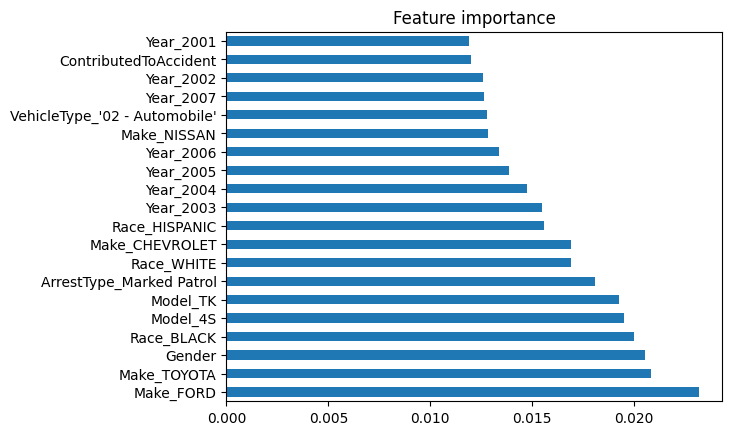

In [38]:
feat_importances = pd.Series(random_forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.title("Feature importance")
plt.show()

In [35]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 150, 200]
}

In [36]:
estimator_rfc = GridSearchCV(RandomForestClassifier(random_state=24), param_grid=params, cv=3)

In [39]:
estimator_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 150, 200]})

In [40]:
estimator_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

In [41]:
estimator_rfc.best_score_

0.6257454850902983

In [42]:
report(estimator_rfc.best_estimator_, X_train, y_train)

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     23810
           1       0.95      0.96      0.95     23810
           2       0.87      0.88      0.87     23810

    accuracy                           0.90     71430
   macro avg       0.90      0.90      0.90     71430
weighted avg       0.90      0.90      0.90     71430

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  20326     782        2702
1    378   22924         508
2   2342     523       20945
---------------------------------------------------------------------------------


In [43]:
report(estimator_rfc.best_estimator_, X_test, y_test, "test")

Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.51      0.52      9637
           1       0.07      0.18      0.10      1049
           2       0.55      0.49      0.52     10205

    accuracy                           0.48     20891
   macro avg       0.39      0.40      0.38     20891
weighted avg       0.52      0.48      0.50     20891

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on test data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0   4891    1145        3601
1    389     194         466
2   3832    1343        5030
---------------------------------------------------------------------------------


In [44]:
estimator_rfc.cv_results_

{'mean_fit_time': array([34.24246796, 48.47726528, 52.62042713, 14.9768072 , 20.83731222,
        26.04606342, 13.07804648, 19.53380227, 26.19166334]),
 'std_fit_time': array([3.07580121, 4.52700174, 2.38999107, 0.97288312, 0.88533142,
        0.31208845, 0.1313848 , 0.15641251, 0.24074288]),
 'mean_score_time': array([2.31272284, 2.41238991, 2.92327611, 0.84007676, 1.24998554,
        1.57876197, 0.79652492, 1.17418337, 1.56048862]),
 'std_score_time': array([0.48309328, 0.25855102, 0.88804034, 0.03234438, 0.05361308,
        0.03285388, 0.01267852, 0.00729842, 0.01630919]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'log_loss', 'log_loss', 'log_loss'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 150, 200, 100, 150, 200, 100, 150, 200],
              mask=[

# Poređenje dobijenih modela

Koristićemo ROC krivu, ali moramo izmeniti standardnu metodu koja se koristi za binarnu klasifikaciju.

Koristićemo OvR (One vs Rest - Jedan naspram Ostalih) metodu za evaluaciju modela. Tj. merićemo razdvojenost svake klase zasebno od svih ostalih klasa.

In [45]:
classes = dtc.classes_
classes

array([0, 1, 2], dtype=int64)

In [46]:
def calculate_tpr_fpr(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    tpr =  TP/(TP + FN)
    fpr = 1 - TN/(TN+FP)
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

## Stablo odlučivanja

Tačnost: 0.4273
Histogrami i ROC krive:


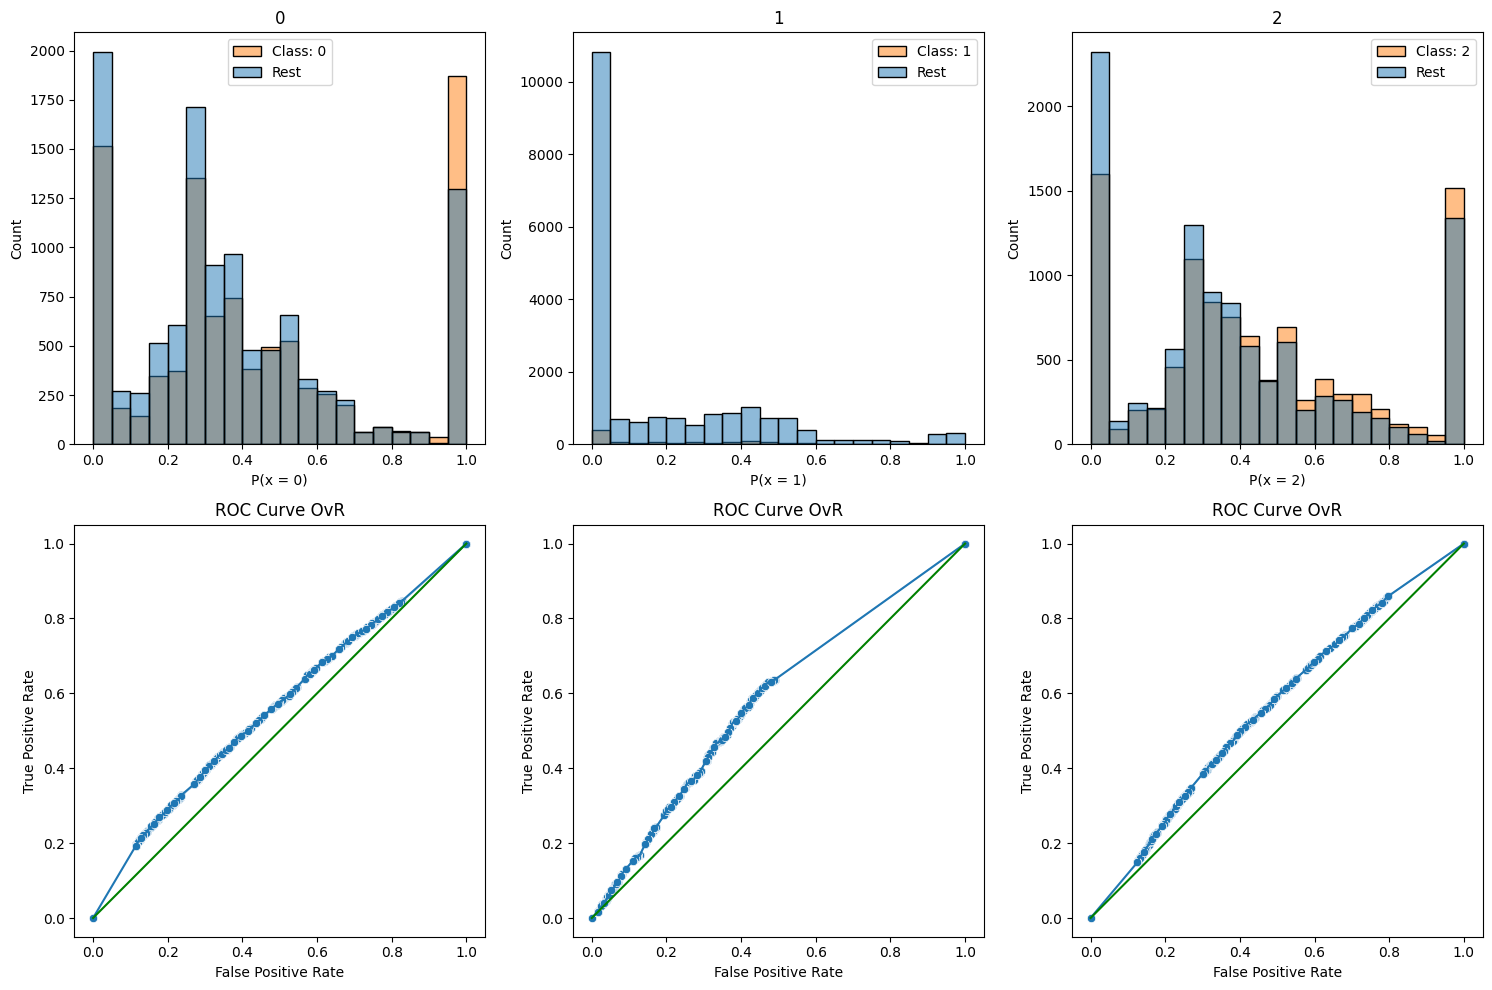

In [47]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
    
y_pred = dtc.predict(X_test)
y_proba = dtc.predict_proba(X_test)
print("Tačnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]

    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

## GridSearchCV

tacnost: 0.4608
Histogrami i ROC krive:


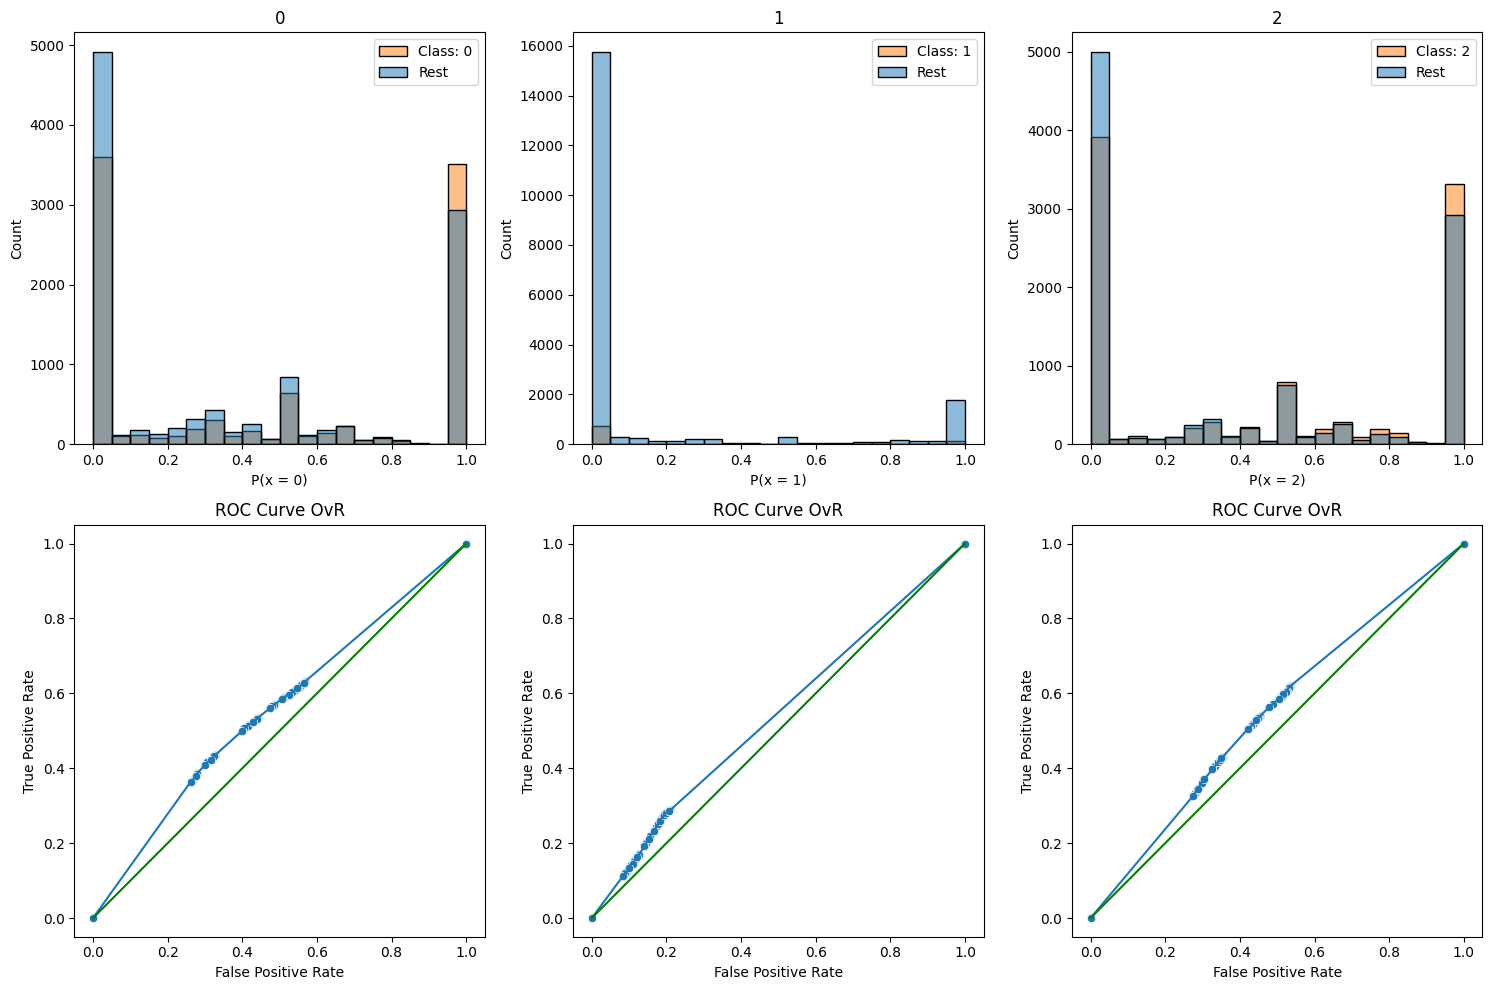

In [48]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = estimator_dtc.best_estimator_.predict(X_test)
y_proba = estimator_dtc.best_estimator_.predict_proba(X_test)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

## Slučajne šume

tacnost: 0.4812
Histogrami i ROC krive:


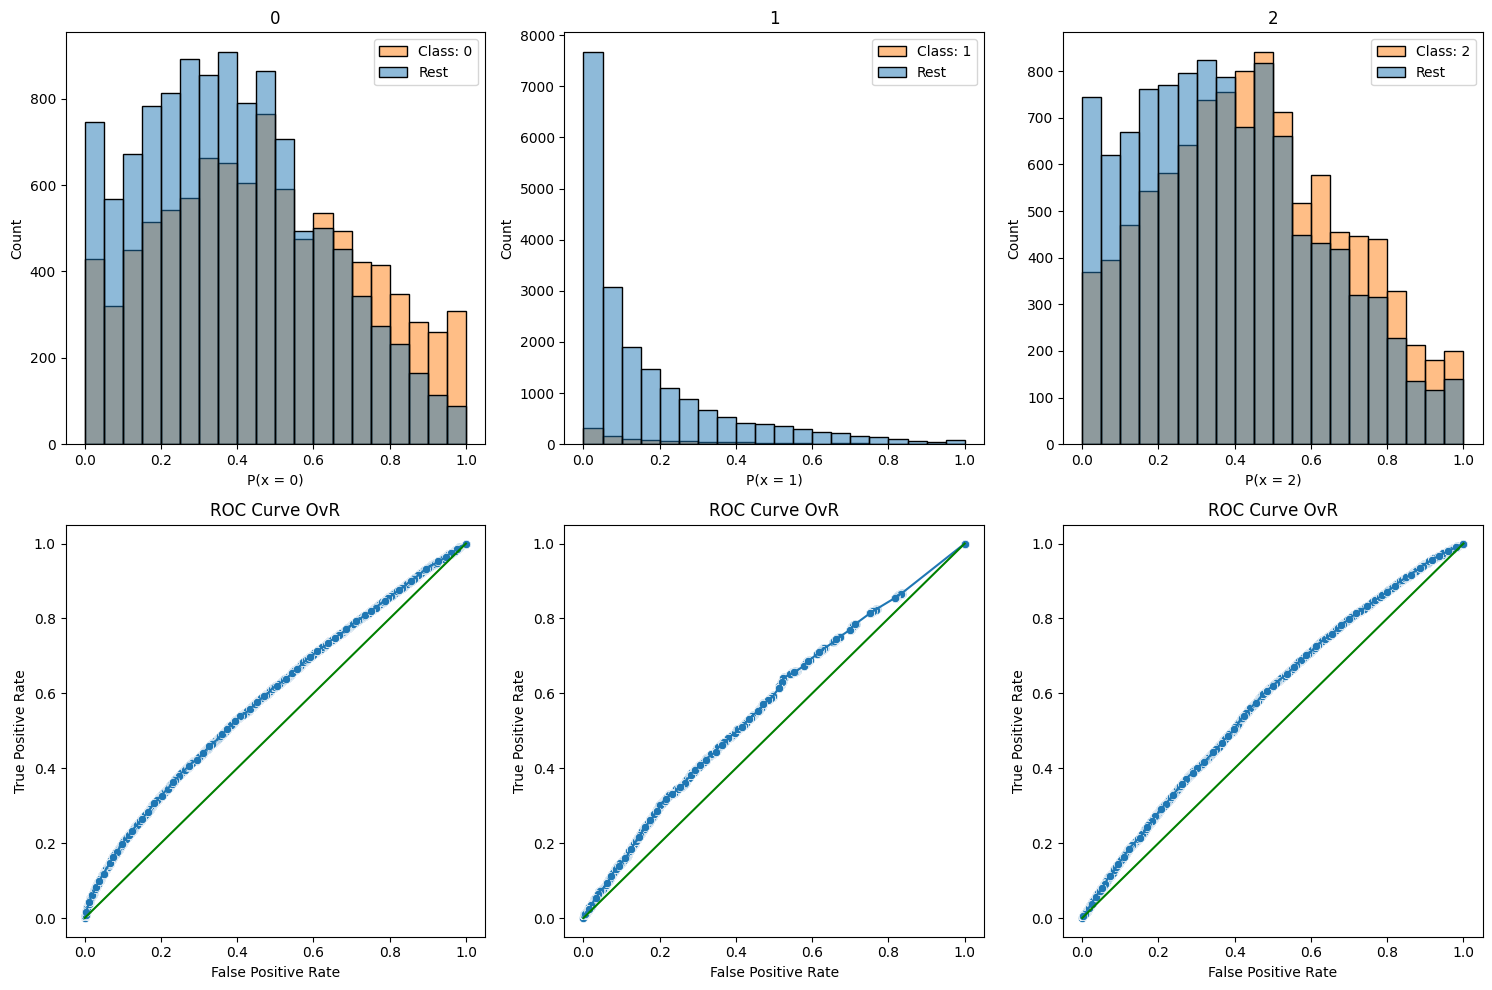

In [49]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

## Slučajne šume - GridSearchCV

tacnost: 0.4842
Histogrami i ROC krive:


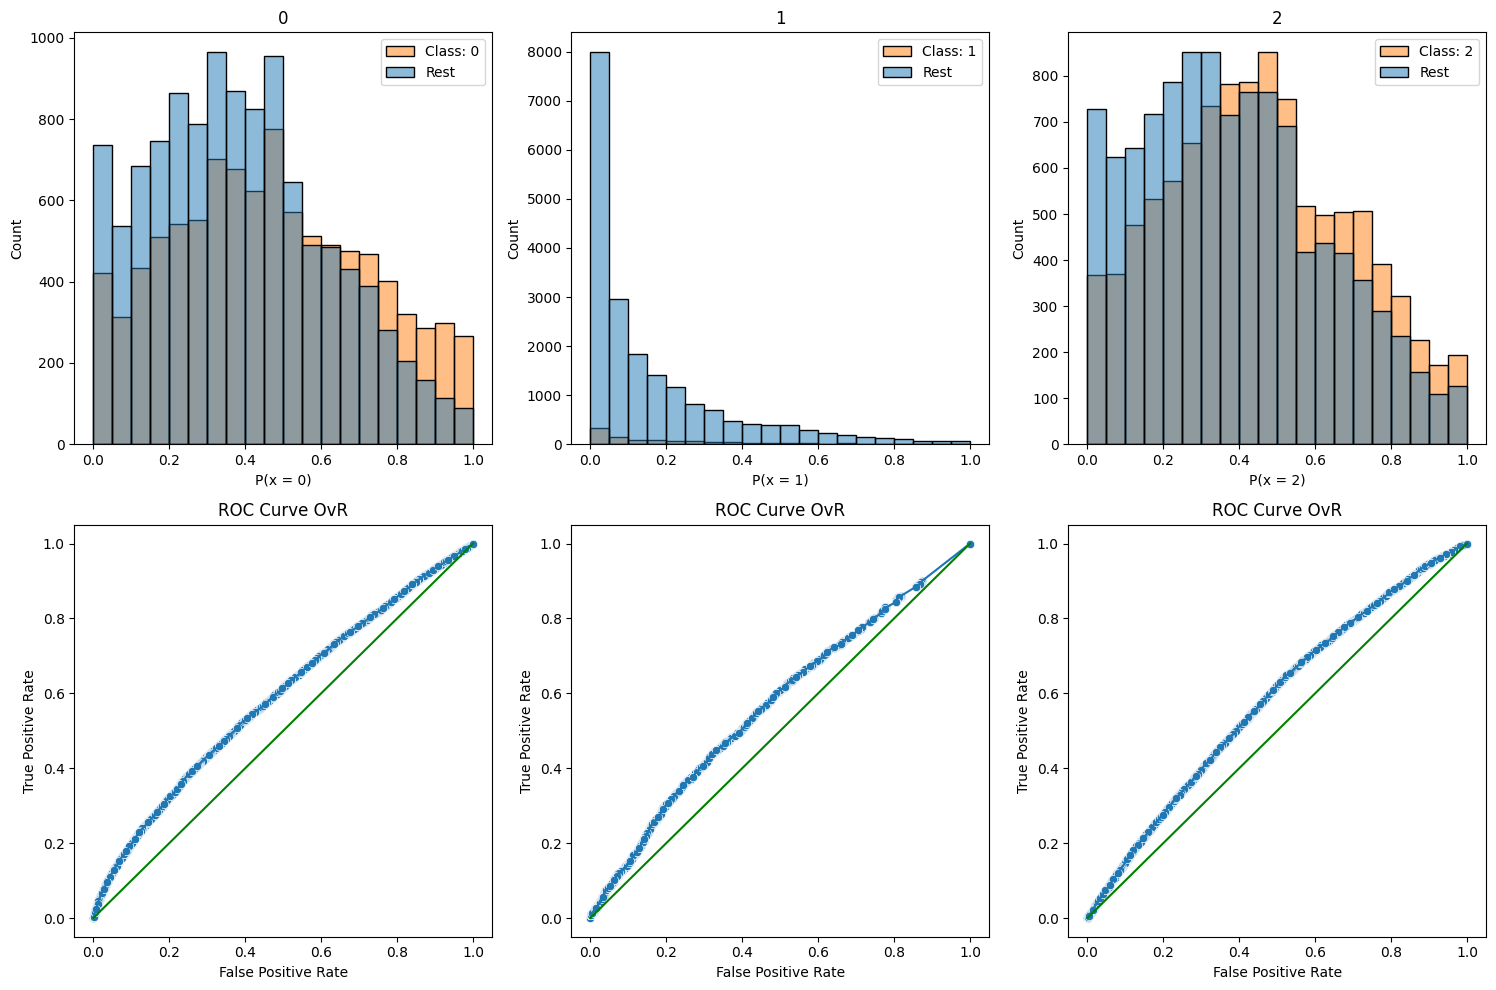

In [50]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = estimator_rfc.best_estimator_.predict(X_test)
y_proba = estimator_rfc.best_estimator_.predict_proba(X_test)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()